# Object Detection

## Get Dataset

In [ ]:
import kagglehub

DATA_PATH = kagglehub.dataset_download("samuelayman/object-detection")
print("Object Detection Dataset Path:", DATA_PATH)

100%|██████████| 1.40G/1.40G [00:36<00:00, 41.5MB/s]

Extracting files...


Object Detection Dataset Path: /root/.cache/kagglehub/datasets/samuelayman/object-detection/versions/1


## Prepare Dataset

In [ ]:
import os
import yaml
import shutil

In [ ]:
batches = ["Batch 1", "Batch 2", "Batch 3", "Batch 4"]
dataset_dir = "dataset"

if not os.path.isdir(dataset_dir):
  splits = ["train", "val", "test"]
  for split in splits:
    os.makedirs(os.path.join(dataset_dir, "images", split), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, "labels", split), exist_ok=True)

  for batch in batches:
    for split in splits:
      batch_path = os.path.join(DATA_PATH, 'final batches', batch)
      img_src = os.path.join(batch_path, "images", split)
      lbl_src = os.path.join(batch_path, "labels", split)

      for f in os.listdir(img_src):
        shutil.copy(os.path.join(img_src, f), os.path.join(dataset_dir, "images", split, f))

      for f in os.listdir(lbl_src):
        shutil.copy(os.path.join(lbl_src, f), os.path.join(dataset_dir, "labels", split, f))

  print("Merged All Batch")
else:
  print("Already merged")

Merged All Batch


In [ ]:
print(f"Training Data: {len(os.listdir(dataset_dir + "/images/train"))} Images")
print(f"Validation Data: {len(os.listdir(dataset_dir + "/images/val"))} Images")
print(f"Testing Data: {len(os.listdir(dataset_dir + "/images/test"))} Images")

Training Data: 11918 Images
Validation Data: 2987 Images
Testing Data: 792 Images


In [ ]:
classes = ["Person", "Chair", "Toothbrush", "Knife", "Bottle", "Cup", "Spoon", "Bench", "Refrigerator", "Fork", "Bus", "Toilet",
           "Bicycle", "Airplane", "Truck", "Motorcycles", "Oven", "Dog", "Bed", "Cat", "Traffic Light", "Currency", "Face", "Stop Sign",
           "Car", "Barriers", "Path Holes", "Stairs", "Train", "Bin", "Blind Stick", "Men Sign", "Cell Phone", "Women Sign", "Tap"]

yaml_dict = {
    "path": dataset_dir,
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "names": classes
}

with open("data.yaml", "w") as f:
  yaml.dump(yaml_dict, f)

print("data.yaml created")

data.yaml created


## YOLO Model

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
yolo_model = YOLO("yolo11n.pt")
yolo_results = yolo_model.train(data="data.yaml", epochs=20, imgsz=640, batch=64, pretrained=True,
                                lr0=0.0001, optimizer="AdamW", weight_decay=0.0005, plots=True)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

In [ ]:
yolo_model.export(format="onnx")
!cp runs/detect/train/weights/best.onnx "/content/drive/MyDrive/SEM 5 Computer Vision/YOLO_Models/"

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,588,977 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 39, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 204ms
Prepared 6 packages in 7.35s
Installed 6 packages in 381ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.77

requirements: AutoUpdate success ✅ 9.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: start

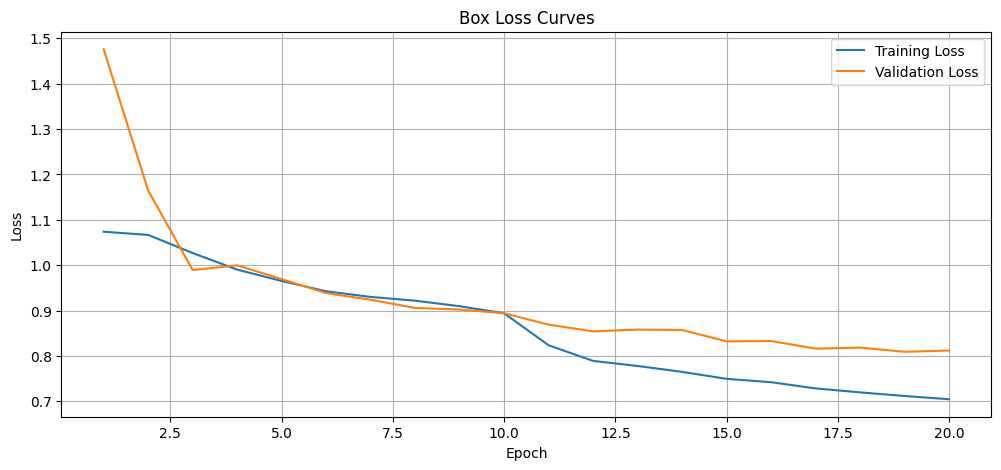

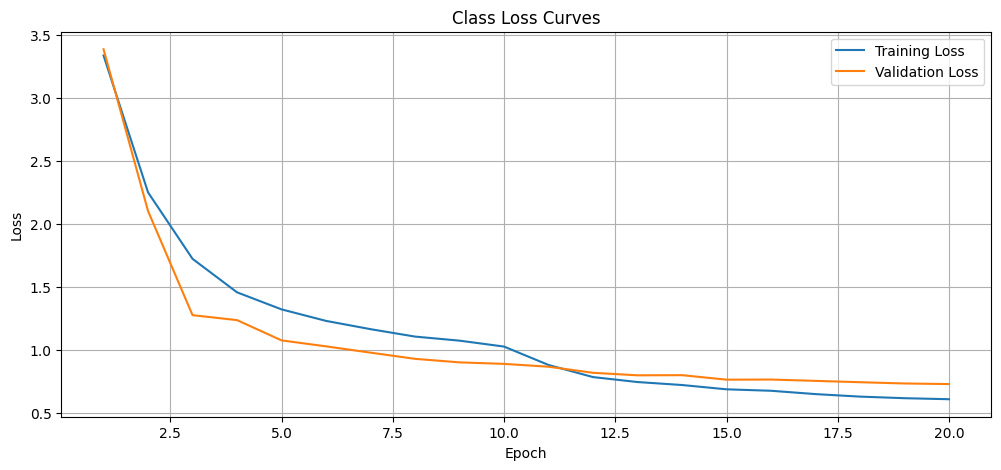

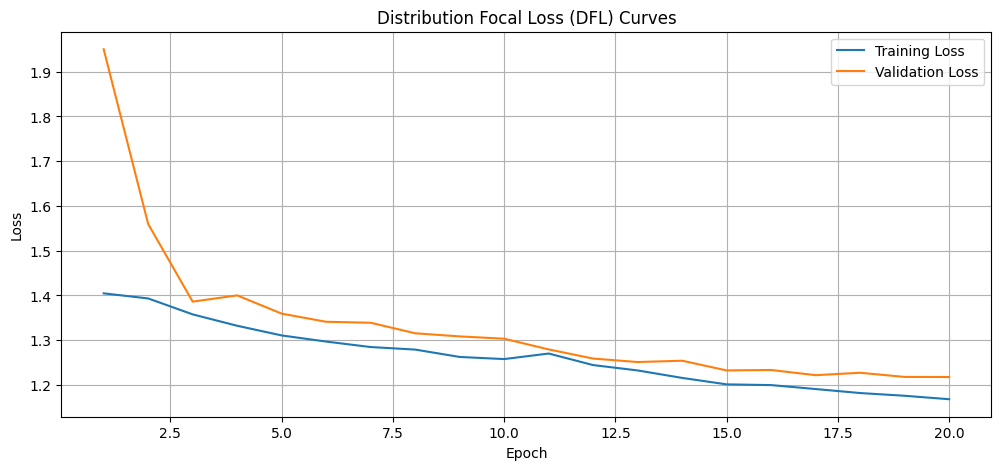

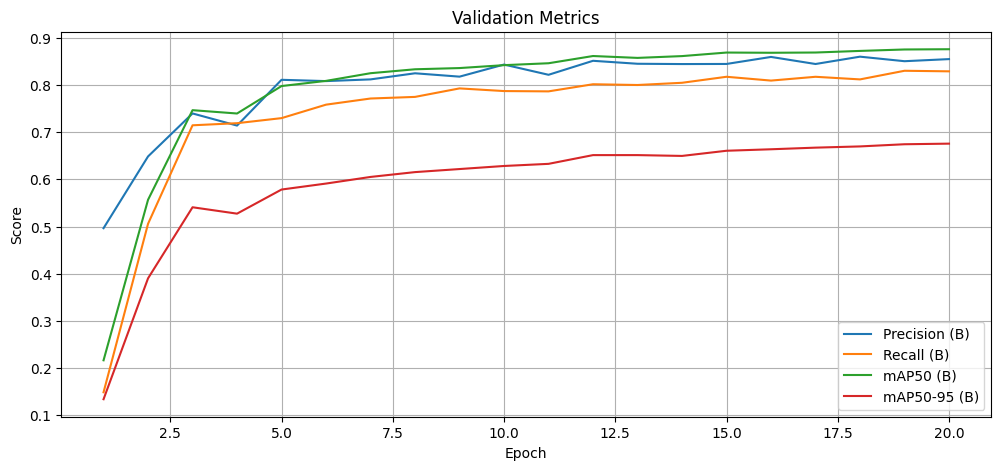

In [ ]:
train_history = pd.read_csv("runs/detect/train/results.csv")

plt.figure(figsize=(12,5))
plt.plot(train_history['epoch'], train_history['train/box_loss'], label='Training Loss')
plt.plot(train_history['epoch'], train_history['val/box_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Box Loss Curves")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12,5))
plt.plot(train_history['epoch'], train_history['train/cls_loss'], label='Training Loss')
plt.plot(train_history['epoch'], train_history['val/cls_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Class Loss Curves")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(train_history['epoch'], train_history['train/dfl_loss'], label='Training Loss')
plt.plot(train_history['epoch'], train_history['val/dfl_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Distribution Focal Loss (DFL) Curves")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(train_history['epoch'], train_history['metrics/precision(B)'], label='Precision (B)')
plt.plot(train_history['epoch'], train_history['metrics/recall(B)'], label='Recall (B)')
plt.plot(train_history['epoch'], train_history['metrics/mAP50(B)'], label='mAP50 (B)')
plt.plot(train_history['epoch'], train_history['metrics/mAP50-95(B)'], label='mAP50-95 (B)')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Metrics")
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_result = yolo_model.val(split="test", save_json=True)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2184.2±591.8 MB/s, size: 133.7 KB)
val: Scanning /content/dataset/labels/test.cache... 792 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 792/792 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 50/50 4.6it/s 10.8s
                   all        792       1217      0.837      0.812      0.882      0.693
                Person         40         58      0.687      0.828      0.834      0.612
                 Chair         32         40      0.924      0.909      0.929      0.823
            Toothbrush         30         54      0.865      0.712      0.818      0.573
                 Knife         27         33      0.834      0.606      0.773       0.46
                Bottle         22         33      0.658      0.848      0.858      0.707
                   Cup         25       

Testing Results:
mAP50: 0.8818920780024767
mAP50-95: 0.6929777028057039


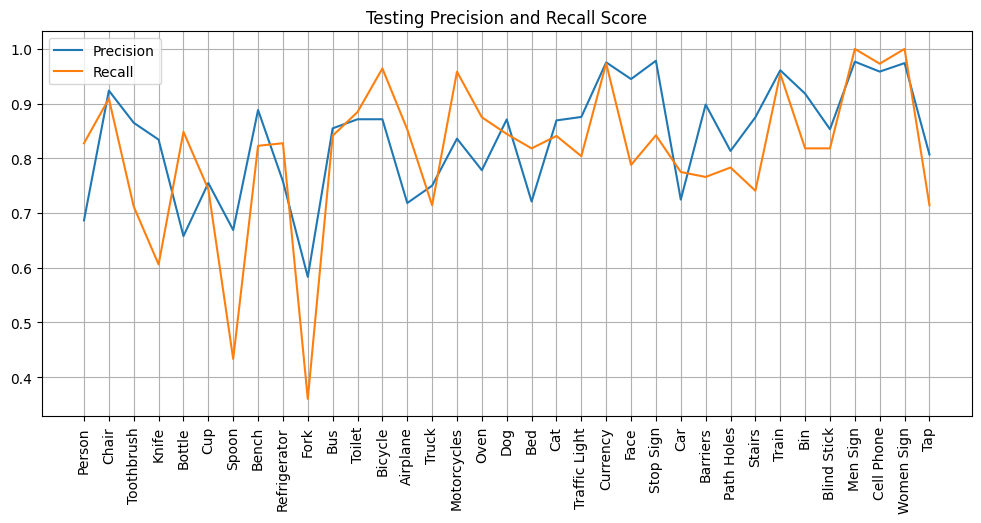

In [ ]:
print("Testing Results:")
print("mAP50:", test_result.box.map50)
print("mAP50-95:", test_result.box.map)

plt.figure(figsize=(12,5))
plt.title("Testing Precision and Recall Score")
plt.plot(classes, test_result.box.p, label="Precision")
plt.plot(classes, test_result.box.r, label="Recall")
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

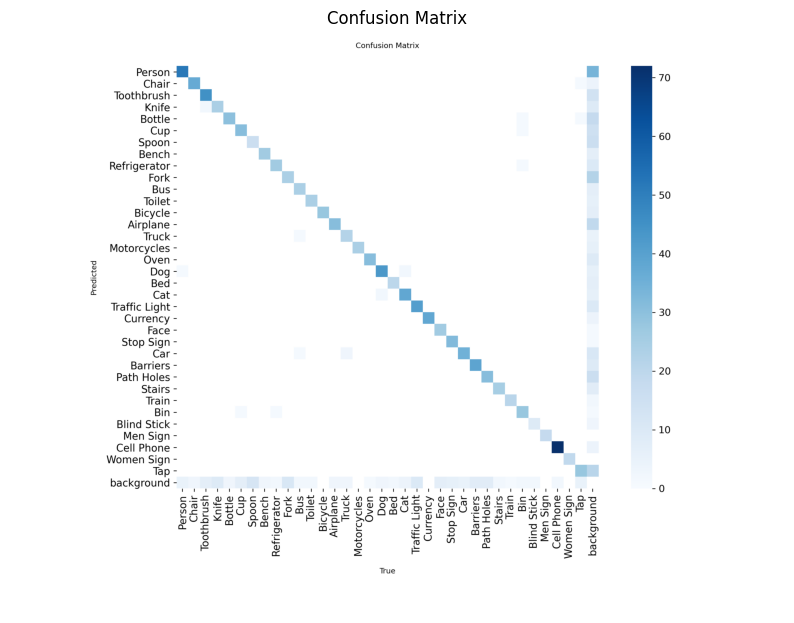

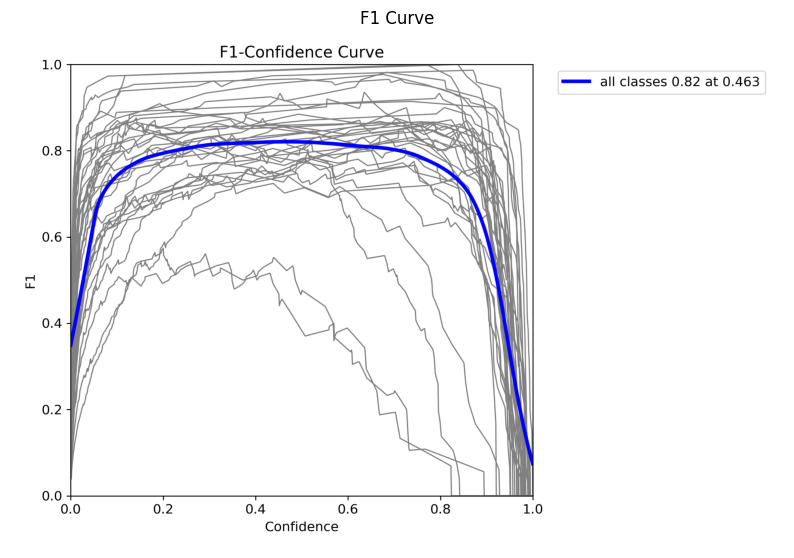

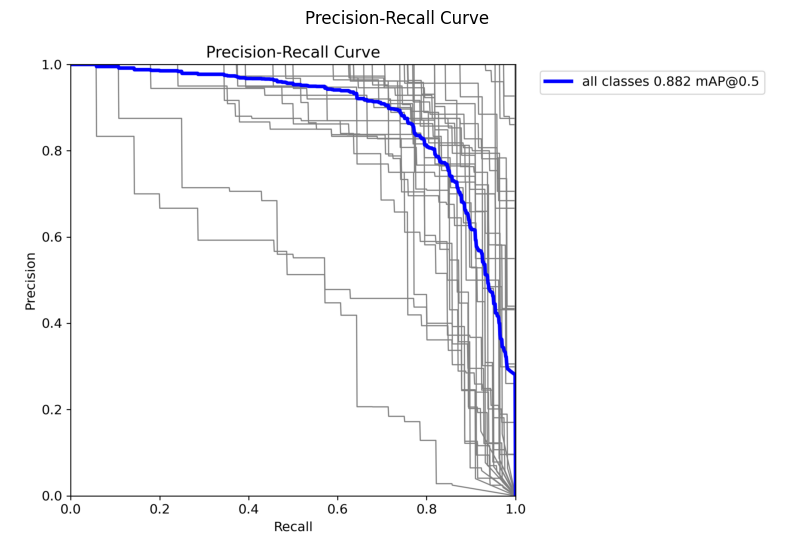

In [ ]:
img_conf = cv2.imread(f"{test_result.save_dir}/confusion_matrix.png")
conf_matrix = cv2.cvtColor(img_conf, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix)
plt.axis('off')
plt.show()

img_f1 = cv2.imread(f"{test_result.save_dir}/BoxF1_curve.png")
f1_curve = cv2.cvtColor(img_f1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title("F1 Curve")
plt.imshow(f1_curve)
plt.axis('off')
plt.show()

img_pr = cv2.imread(f"{test_result.save_dir}/BoxPR_curve.png")
precision_recall = cv2.cvtColor(img_pr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title("Precision-Recall Curve")
plt.imshow(precision_recall)
plt.axis('off')
plt.show()

## Image Comparison

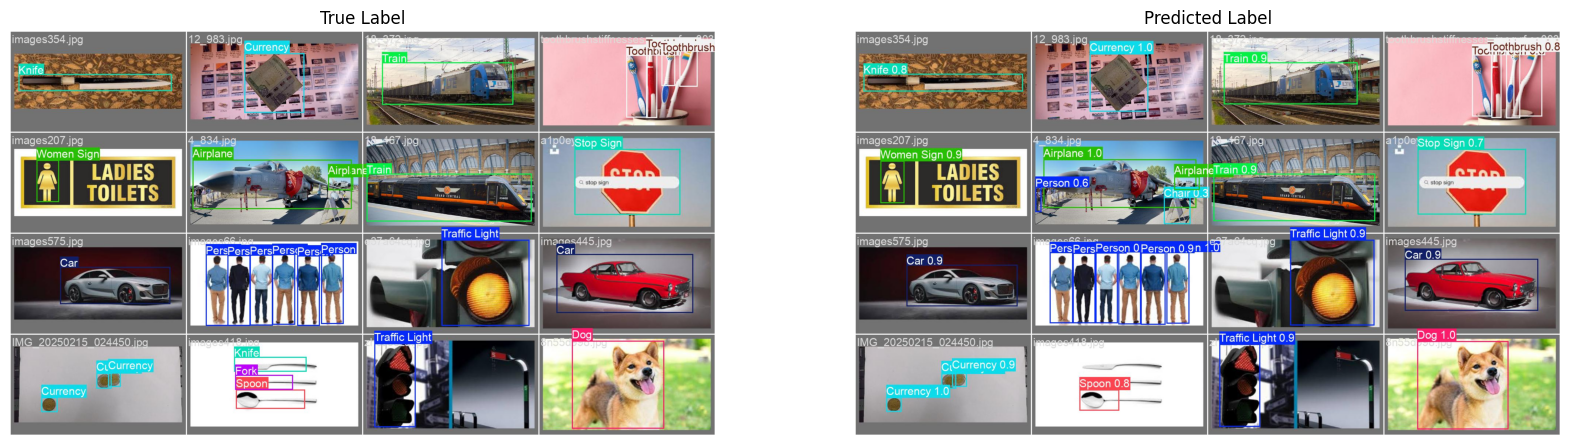

In [ ]:
test_label = cv2.imread(f"{test_result.save_dir}/val_batch0_labels.jpg")
true_label = cv2.cvtColor(test_label, cv2.COLOR_BGR2RGB)
pred_label = cv2.imread(f"{test_result.save_dir}/val_batch0_pred.jpg")
pred_label = cv2.cvtColor(pred_label, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,18))

plt.subplot(1,2,1)
plt.title("True Label")
plt.imshow(true_label)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Predicted Label")
plt.imshow(pred_label)
plt.axis('off')

plt.show()

# Color Detection



## Get Dataset

In [ ]:
import kagglehub

path_color = kagglehub.dataset_download("avi1023/color-names")
print("Color Detection Dataset Path:", path_color)

100%|██████████| 25.3k/25.3k [00:00<00:00, 40.2MB/s]

Extracting files...
Color Detection Dataset Path: /root/.cache/kagglehub/datasets/avi1023/color-names/versions/1


## Prepare Dataset

In [ ]:
import pandas as pd
import os

In [ ]:
color_data = pd.read_csv(os.path.join(path_color, "color_names.csv"))
color_data.head()

,Name,Hex (24 bit),Red (8 bit),Green (8 bit),Blue (8 bit),Hue (degrees),HSL.S (%),"HSL.L (%), HSV.S (%), HSV.V (%)"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [ ]:
color_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             1298 non-null   object 
 1   Hex (24 bit)                     1298 non-null   object 
 2   Red (8 bit)                      1298 non-null   int64  
 3   Green (8 bit)                    1298 non-null   int64  
 4   Blue (8 bit)                     1298 non-null   int64  
 5   Hue (degrees)                    1298 non-null   float64
 6   HSL.S (%)                        1298 non-null   float64
 7   HSL.L (%), HSV.S (%), HSV.V (%)  1298 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 81.3+ KB


In [ ]:
color_names = color_data['Name'].tolist()
color_rgb = color_data[['Red (8 bit)', 'Green (8 bit)', 'Blue (8 bit)']].values.astype(int)

## K-Means Algorithm

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
def get_dominant_color(img, k=3):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  pixels = img_rgb.reshape(-1,3)

  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(pixels)

  counts = np.bincount(kmeans.labels_)
  dominant = kmeans.cluster_centers_[np.argmax(counts)]

  return dominant.astype(int)

def get_color_label(rgb):
  rgb = np.array(rgb)
  distance = np.linalg.norm(color_rgb - rgb, axis=1)
  index = np.argmin(distance)
  return color_names[index]

## Testing

Loading /content/drive/MyDrive/SEM 5 Computer Vision/YOLO_Models/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.2 ('CUDAExecutionProvider', {'device_id': 0})

image 1/1 /content/images.jpg: 640x640 1 Face, 577.5ms
Speed: 9.3ms preprocess, 577.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


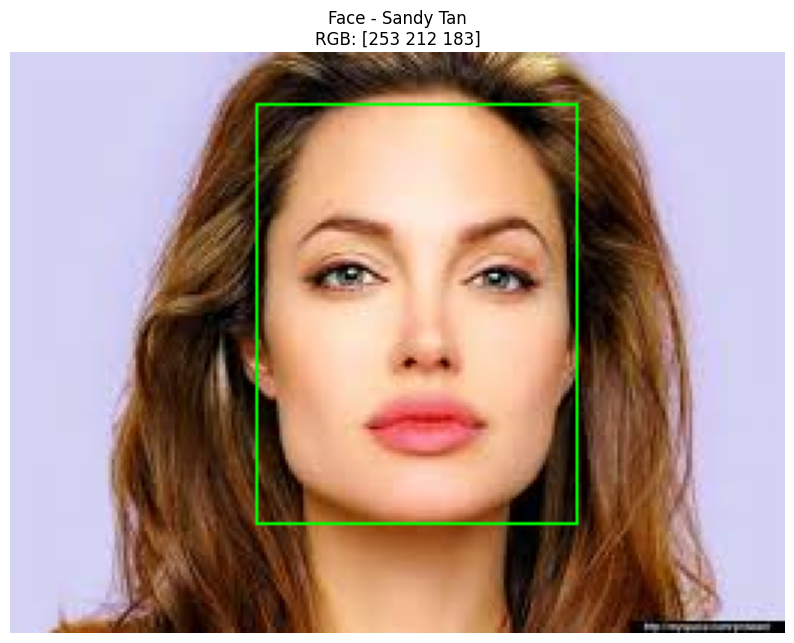

In [ ]:
yolo_model = YOLO("/content/drive/MyDrive/SEM 5 Computer Vision/YOLO_Models/best.onnx", task="detect")
results = yolo_model("images.jpg")
image = cv2.imread("images.jpg")

for r in results:
  for box in r.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls = int(box.cls[0])
    obj_name = yolo_model.names[cls]

    crop = image[y1:y2, x1:x2]

    dominant_color = get_dominant_color(crop, k=5)
    color_label = get_color_label(dominant_color)

    ori_image = image.copy()
    cv2.rectangle(ori_image, (x1, y1), (x2, y2), (0,255,0), 1)

    plt.figure(figsize=(10,10))
    plt.title(f"{obj_name} - {color_label}\nRGB: {dominant_color}")
    plt.imshow(cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


image 1/1 /content/test.jpg: 640x640 1 Person, 1 Car, 243.0ms
Speed: 3.2ms preprocess, 243.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


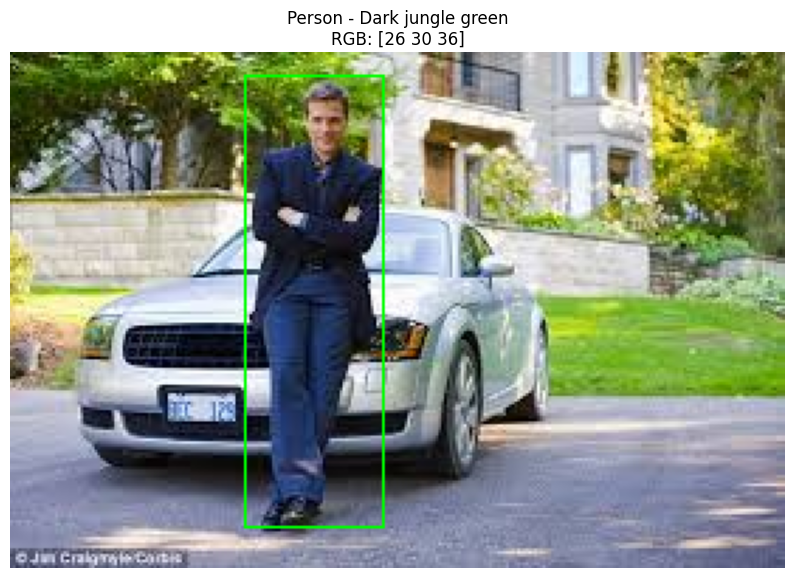

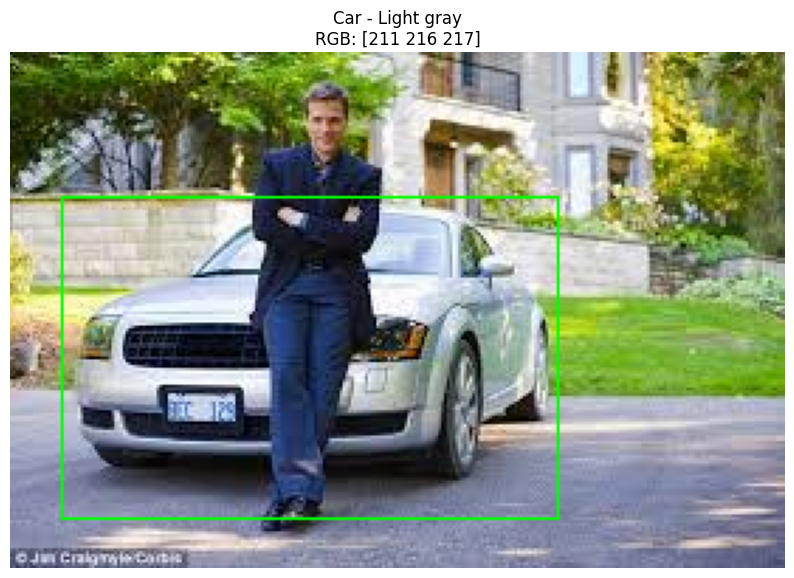

In [ ]:
results = yolo_model("test.jpg")
image = cv2.imread("test.jpg")

for r in results:
  for box in r.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls = int(box.cls[0])
    obj_name = yolo_model.names[cls]

    crop = image[y1:y2, x1:x2]

    dominant_color = get_dominant_color(crop, k=5)
    color_label = get_color_label(dominant_color)

    ori_image = image.copy()
    cv2.rectangle(ori_image, (x1, y1), (x2, y2), (0,255,0), 1)

    plt.figure(figsize=(10,10))
    plt.title(f"{obj_name} - {color_label}\nRGB: {dominant_color}")
    plt.imshow(cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Deployed App

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import cv2
from ultralytics import YOLO
import numpy as np
from sklearn.cluster import KMeans

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
def get_dominant_color(img, k=3):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  pixels = img_rgb.reshape(-1,3)

  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(pixels)

  counts = np.bincount(kmeans.labels_)
  dominant = kmeans.cluster_centers_[np.argmax(counts)]

  return dominant.astype(int)

def get_color_label(rgb):
  rgb = np.array(rgb)
  distance = np.linalg.norm(color_rgb - rgb, axis=1)
  index = np.argmin(distance)
  return color_names[index]

In [ ]:
model = YOLO("/content/drive/MyDrive/SEM 5 Computer Vision/YOLO_Models/best.onnx", task="detect")

def process_image(image_path):
  results = model(image_path)
  image = cv2.imread(image_path)

  result_object = []
  for r in results:
    for box in r.boxes:
      x1, y1, x2, y2 = map(int, box.xyxy[0])
      cls = int(box.cls[0])
      obj_name = model.names[cls]

      crop = image[y1:y2, x1:x2]

      dominant_color = get_dominant_color(crop, k=5)
      color_label = get_color_label(dominant_color)

      text = f"{obj_name}: {color_label}"
      cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
      cv2.putText(image, text, (x1, y1 - 4), cv2.FONT_HERSHEY_PLAIN, 0.8, (0,255,0), 1)

      result_object.append(f"{obj_name.upper()}: {color_label} - Dominant RGB {dominant_color}")

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  if len(result_object) > 0: result_text = "\n".join([f"- {item}" for item in result_object])
  else:
      result_text = "- No objects detected"

  return image_rgb, result_text

In [ ]:
with gr.Blocks() as demo:
  gr.Markdown("# Object and Colour Detection <span style='font-size:14px;'>By Group 4</span>")
  gr.Markdown("### Object Detection using YOLOv11 for better results. With Color Detection using K-Means for more detailed object information.")

  with gr.Row(equal_height=True):
    img_input = gr.Image(type="filepath")
    img_output = gr.Image(type="numpy")

  btn = gr.Button("Detect Image")
  gr.Markdown("Detected Objects & Colors")
  obj_text = gr.Markdown("- [detect an image first...]")

  btn.click(process_image, img_input, [img_output, obj_text])

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd16d40604ae111ef2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
